In [2]:
import os
import clip
import json
import spacy
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

from PIL import Image
from dotenv import load_dotenv
from qdrant_client import QdrantClient
from qdrant_client.models import Distance, VectorParams, PointStruct

load_dotenv()

/home/ahmedcr7/miniconda3/envs/SafeBlur-AI/lib/python3.11/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


True

In [7]:
# os.chdir("../")

In [18]:
with open("./data/data.json", 'r') as f:
    data = json.load(f)

Data = data[:5000]
Data[0]

{'type': 'chair',
 'color': 'gold',
 'prompt': 'Professional product photography of a industrial gold chair, made of plywood, modular shape, featuring mesh back, conference in mind, luxury price range. Pure white background, studio lighting, commercial product photography, 8k, ultra detailed, centered composition, professional furniture catalog style',
 'img_path': '/home/ahmedcr7/Programming/Graduation_Project/ImageTextSearchEngine/data/images/image_0.jpg'}

In [19]:
Data[0]["prompt"]

'Professional product photography of a industrial gold chair, made of plywood, modular shape, featuring mesh back, conference in mind, luxury price range. Pure white background, studio lighting, commercial product photography, 8k, ultra detailed, centered composition, professional furniture catalog style'

In [20]:
text1 = "Professional product photography of a"
text2 = "Pure white background, studio lighting, commercial product photography, 8k, ultra detailed, centered composition, professional furniture catalog style"

cnt = 0
for raw in Data:
    if raw["prompt"].startswith(text1) and raw["prompt"].endswith(text2):
        cnt += 1
print(cnt)

5000


In [21]:
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    """
    Use spaCy to preprocess the input text:
    - Lowercasing
    - Removing stopwords, punctuation, and non-alphabetic tokens
    - Lemmatization
    """
    text = text.replace(text1, "")
    text = text.replace(text2, "")
    doc = nlp(text.lower())
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha and not token.is_stop
    ]
    return " ".join(tokens)

In [22]:
for raw in Data:
    raw["prompt"] = preprocess_text(raw["prompt"])

Data[0]["prompt"]

'industrial gold chair plywood modular shape feature mesh conference mind luxury price range'

In [13]:
device = "cpu"
model, _ = clip.load("ViT-B/32", device=device)

In [22]:
# text_data = [raw["prompt"] for raw in Data]

In [ ]:
# text_tokens = clip.tokenize(text_data).to(device)
# with torch.no_grad():
#     text_features = model.encode_text(text_tokens)
#     text_features = F.normalize(text_features, p=2, dim=-1)

In [15]:
QDRANT_HOST = os.getenv("QDRANT_HOST")
QDRANT_API_KEY = os.getenv("QDRANT_API_KEY")

client = QdrantClient(
    url=QDRANT_HOST,
    api_key=QDRANT_API_KEY,
    timeout=60.0
)

In [16]:
collection_name = "furniture_descriptions"

# client.recreate_collection(
#     collection_name=collection_name,
#     vectors_config=VectorParams(size=512, distance=Distance.COSINE)
# )

In [ ]:
# for chunk in range(0, len(text_data), 500):
#     points = []
#     text_batch = text_data[chunk:chunk+500]
#     feature_batch = text_features[chunk:chunk+500]

#     for i, (text, feature) in enumerate(zip(text_batch, feature_batch)):
#         points.append(
#             PointStruct(id=i+chunk, vector=feature.tolist(), payload={"text": text})
#         )

#     client.upsert(collection_name=collection_name, points=points)

/tmp/ipykernel_12213/3731541953.py:7: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  search_result = client.search(


score: 0.798856


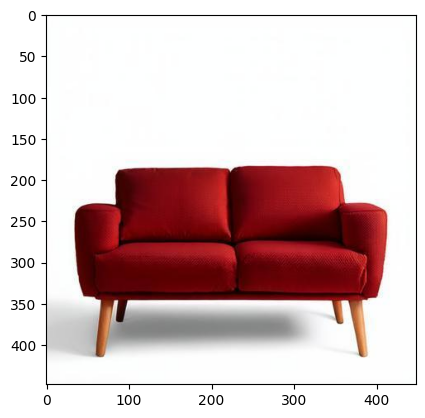

score: 0.79779553


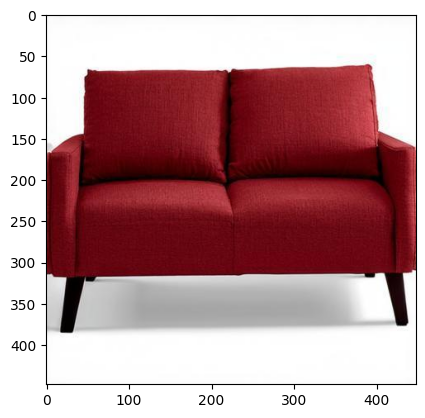

score: 0.7956687


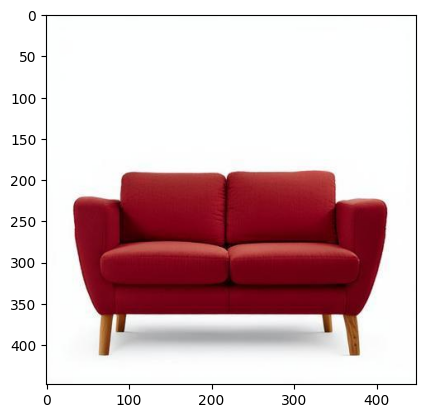

score: 0.7922782


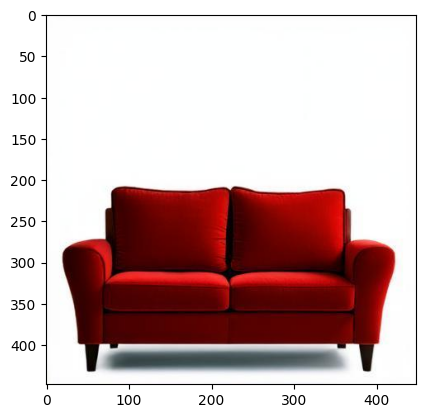

score: 0.7907959


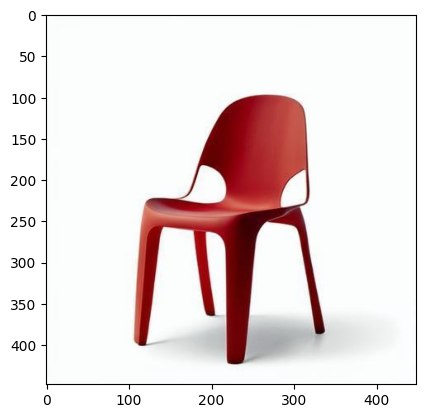

score: 0.78718376


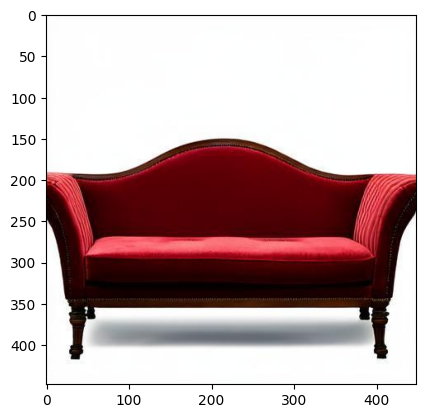

score: 0.7798692


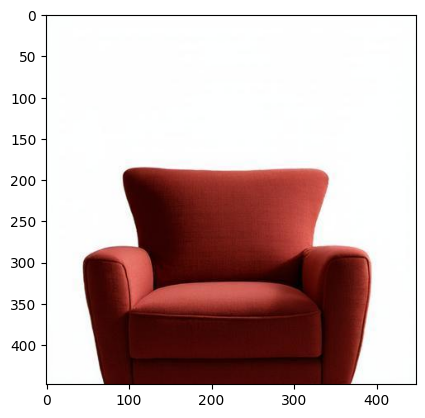

score: 0.7752139


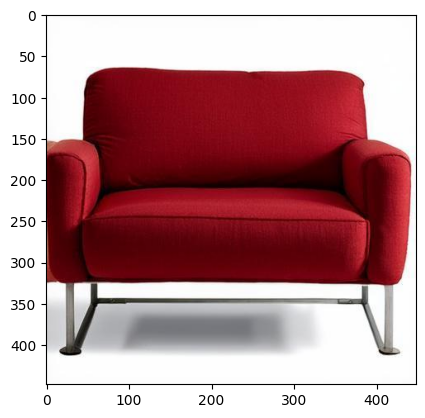

score: 0.7743785


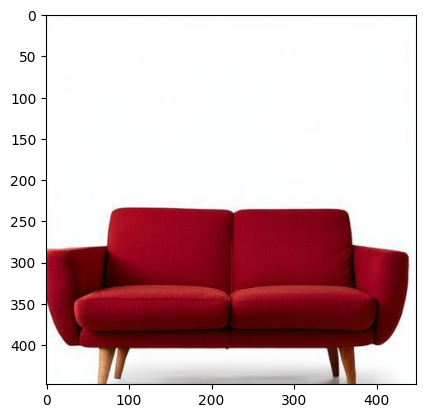

score: 0.7728731


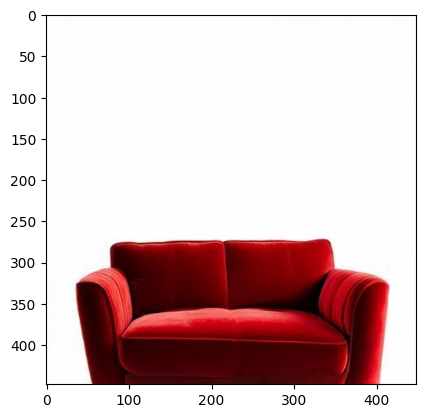

In [23]:
query = "a small red couch with wooden legs"
tokens = clip.tokenize([query]).to(device)
with torch.no_grad():
    query_vec = model.encode_text(tokens)[0]
    query_vec = F.normalize(query_vec, p=2, dim=-1)

search_result = client.search(
    collection_name=collection_name,
    query_vector=query_vec.tolist(),
    limit=10
)

for hit in search_result:
    idx = hit.id
    score = hit.score

    print(f"score: {score}")
    plt.imshow(Image.open(Data[idx]['img_path']))
    plt.show()

/tmp/ipykernel_12213/2555237373.py:7: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  search_result = client.search(


score: 0.8143083


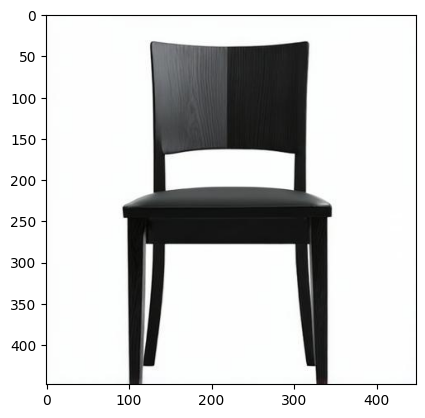

score: 0.79722166


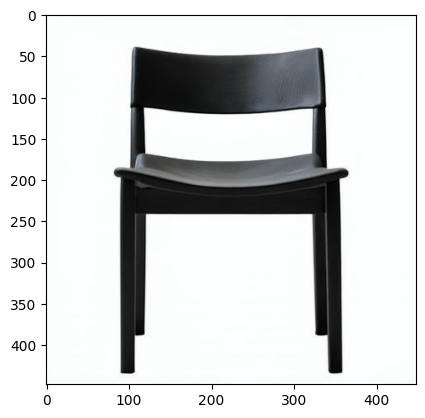

score: 0.7936282


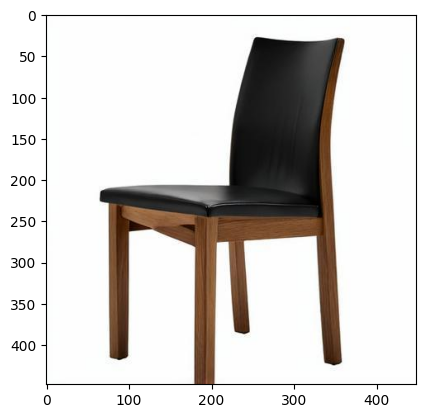

score: 0.78062487


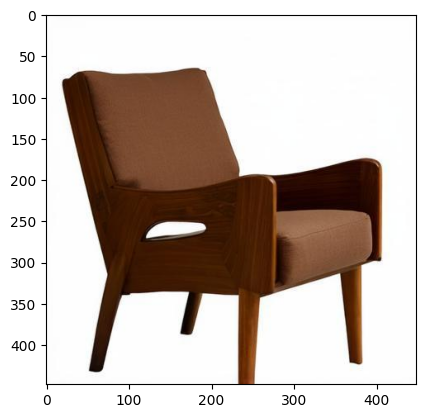

score: 0.7801516


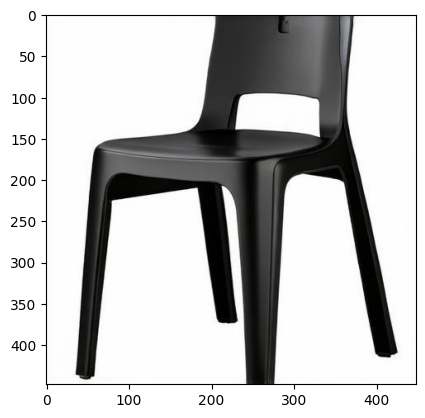

score: 0.77849066


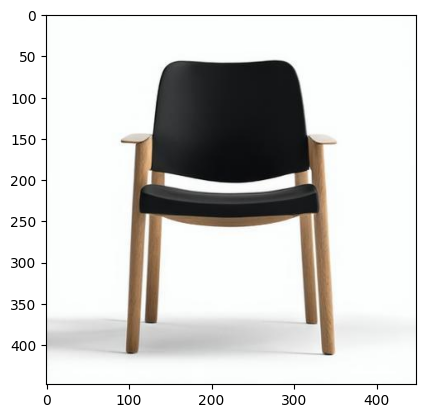

score: 0.76896656


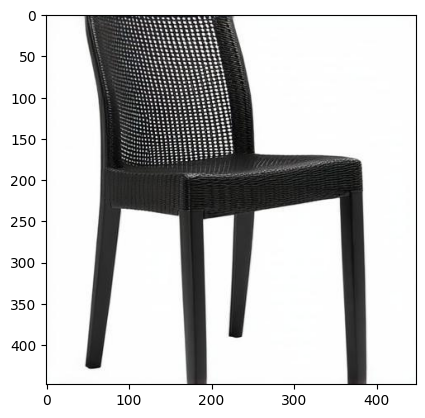

score: 0.7688339


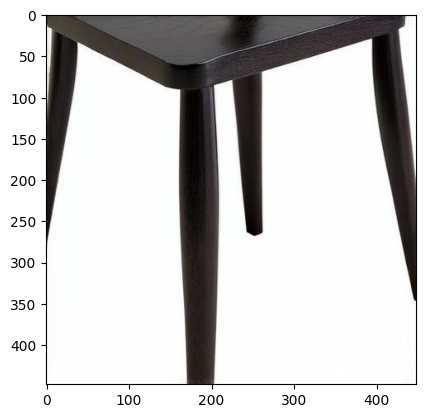

score: 0.76529443


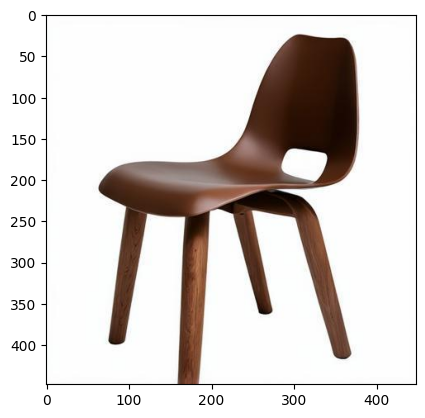

score: 0.7636854


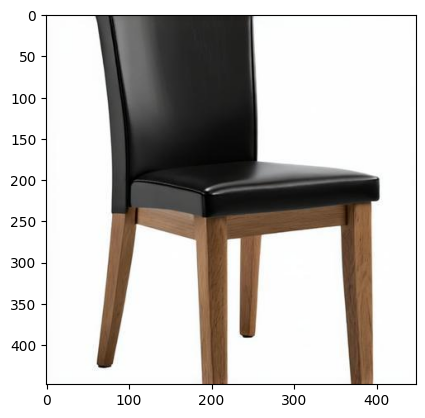

In [24]:
query = "a small black chair with wooden legs"
tokens = clip.tokenize([query]).to(device)
with torch.no_grad():
    query_vec = model.encode_text(tokens)[0]
    query_vec = F.normalize(query_vec, p=2, dim=-1)

search_result = client.search(
    collection_name=collection_name,
    query_vector=query_vec.tolist(),
    limit=10
)

for hit in search_result:
    idx = hit.id
    score = hit.score

    print(f"score: {score}")
    plt.imshow(Image.open(Data[idx]['img_path']))
    plt.show()